In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/6/bank-full.csv', delimiter=';')

In [5]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#The last column in the dataset 'y' is our response. This report tries to get the best model to predict the subscription of term deposit. 

In [6]:
#EDA and Data Cleaning

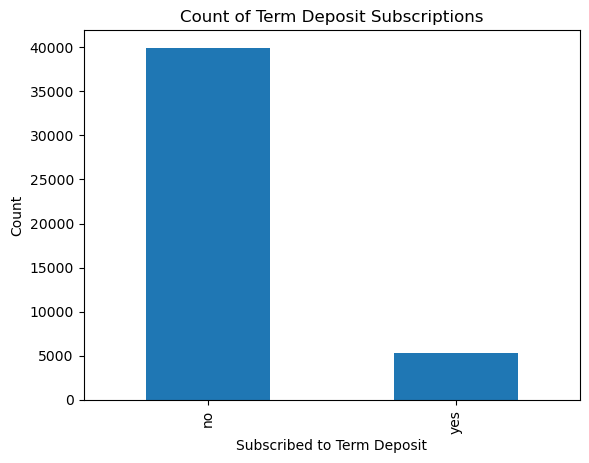

In [7]:
# Plot count vs y
count_plot = data['y'].value_counts().plot(kind='bar')
count_plot.set_xlabel('Subscribed to Term Deposit')
count_plot.set_ylabel('Count')
count_plot.set_title('Count of Term Deposit Subscriptions')
plt.show()

In [1]:
#Data is highly imbalanced. the number of people saying no to term deposit is more than the people saying yes.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Handling missing values
data = data.dropna()  # Drop rows with missing values

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [15]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [19]:
#MODEL FITTING

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = data1.drop('y', axis=1)  # Replace 'target_variable' with the actual name of the target column
y = data1['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Imbalanced -")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Imbalanced -
Accuracy: 0.8900807254229791
Precision: 0.6203473945409429
Recall: 0.229147571035747
F1 Score: 0.33467202141900937


In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE



# Perform under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Train the logistic regression model on under-sampled data
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Make predictions on the test set for under-sampled model
y_pred_under = model_under.predict(X_test)


In [29]:
# Evaluate the under-sampled model
print("Undersampled -")
accuracy_under = accuracy_score(y_test, y_pred_under)
precision_under = precision_score(y_test, y_pred_under)
recall_under = recall_score(y_test, y_pred_under)
f1_under = f1_score(y_test, y_pred_under)
print('Accuracy:', accuracy_under)
print('Precision:', precision_under)
print('Recall:', recall_under)
print('F1 Score:', f1_under)

Undersampled -
Accuracy: 0.8062589848501603
Precision: 0.36165759732105485
Recall: 0.7919340054995417
F1 Score: 0.4965517241379311


In [30]:
# Perform over-sampling using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# Train the logistic regression model on over-sampled data
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Make predictions on the test set for over-sampled model
y_pred_over = model_over.predict(X_test)


In [34]:
# Evaluate the over-sampled model
print("Oversampled -")
accuracy_over = accuracy_score(y_test, y_pred_over)
precision_over = precision_score(y_test, y_pred_over)
recall_over = recall_score(y_test, y_pred_over)
f1_over = f1_score(y_test, y_pred_over)

print('Accuracy:', accuracy_over)
print('Precision:', precision_over)
print('Recall:', recall_over)
print('F1 Score:', f1_over)

Oversampled -
Accuracy: 0.8075859781046113
Precision: 0.3631379164909321
Recall: 0.7891842346471127
F1 Score: 0.49740034662045063


In [35]:
# Perform over-sampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on SMOTE data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Make predictions on the test set for SMOTE model
y_pred_smote = model_smote.predict(X_test)


In [37]:
# Evaluate the SMOTE model
print("SMOTE -")
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

print('Accuracy:', accuracy_smote)
print('Precision:', precision_smote)
print('Recall:', recall_smote)
print('F1 Score:', f1_smote)

SMOTE -
Accuracy: 0.8632091120203472
Precision: 0.45094086021505375
Recall: 0.615032080659945
F1 Score: 0.5203567274137262


In [39]:
from sklearn.metrics import roc_curve, auc


# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_imbalanced, tpr_imbalanced, _ = roc_curve(y_test, y_pred)
fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_under)
fpr_over, tpr_over, _ = roc_curve(y_test, y_pred_over)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_smote)


In [54]:
# Calculate the AUC scores
roc_auc_imbalanced = auc(fpr_imbalanced, tpr_imbalanced)
roc_auc_under = auc(fpr_under, tpr_under)
roc_auc_over = auc(fpr_over, tpr_over)
roc_auc_smote = auc(fpr_smote, tpr_smote)


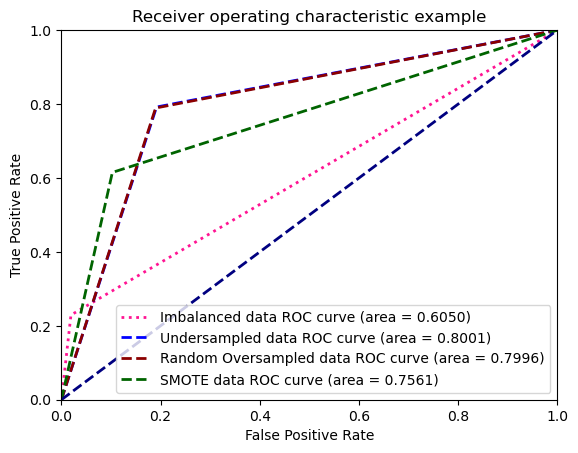

In [55]:
plt.figure()
lw = 2
plt.plot(fpr_imbalanced, tpr_imbalanced,
         label='Imbalanced data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_imbalanced),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr_under, tpr_under,
         label='Undersampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_under),
         color='blue', linestyle='--', linewidth=2)

plt.plot(fpr_over, tpr_over,
         label='Random Oversampled data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_over),
         color='darkred', linestyle='--', linewidth=2)

plt.plot(fpr_smote, tpr_smote,
         label='SMOTE data ROC curve (area = {0:0.4f})'
               ''.format(roc_auc_smote),
         color='darkgreen', linestyle='--', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
#After treating imbalanced data, we can say that SMOTE gives the best results of precision and recall

In [57]:
#CROSS-VALIDATION
#By performing cross-validation on the logistic regression model trained on SMOTE data, we can obtain reliable evaluation results and assess the model's performance in a more robust manner.

In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [59]:
# Specify the number of folds for cross-validation
k = 5

# Create a cross-validation object with stratified k-fold
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation on the SMOTE data
scores = cross_val_score(model_smote, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print("Fold", fold+1, "- Accuracy:", score)

# Compute the average accuracy across all folds
average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)

/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Fold 1 - Accuracy: 0.8959180481701595
Fold 2 - Accuracy: 0.8981857991867376
Fold 3 - Accuracy: 0.8979512042539881
Fold 4 - Accuracy: 0.893259305598999
Fold 5 - Accuracy: 0.8974820143884892
Average Accuracy: 0.8965592743196747


/Users/deeptilalwani/Downloads/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#Based on these results, we can conclude that the logistic regression model trained on SMOTE data performs well, with an average accuracy of 0.89. 
#This indicates that the SMOTE technique effectively handled the class imbalance in the dataset and improved the model's performance.